In [8]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [9]:
class BatsmanState(TypedDict):
#  Given
    runs: int
    balls: int
    sixes: int
    fours: int

#  To calculate
    sr: float
    bpb: float
    boundary_percent: float
    summary: str

In [25]:
def calculate_sr(state: BatsmanState):

    sr =  (state['runs'] / state['balls']) *100
    
    
    return {'sr': sr}

In [26]:
def calculate_bpb(state: BatsmanState):
    
    bpb = state['balls']/state['fours'] + state['sixes']
    

    return {'bpb':bpb}

In [27]:
def calculate_boundary_percent(state: BatsmanState):
    
    boundary_percent = (((state['fours']* 4 + state['sixes'] * 6))/state[
        'runs'])*100
  
    return {'boundary_percent': boundary_percent}

In [28]:
def summary(state: BatsmanState):
    
    summary = f"""
    Strike Rate- {state['sr']} \n
    Balls per boundary - {state['boundary_percent']}
    """
    
    return {'summary': summary}

In [29]:
# create a graph
graph = StateGraph(BatsmanState)

# nodes
graph.add_node('calculate_sr',calculate_sr)
graph.add_node('calculate_bpb',calculate_bpb)
graph.add_node('calculate_boundary_percent',calculate_boundary_percent)
graph.add_node('summary', summary) 

# edges
graph.add_edge(START, 'calculate_sr')
graph.add_edge(START, 'calculate_bpb')   # parallel 
graph.add_edge(START, 'calculate_boundary_percent')

graph.add_edge('calculate_sr','summary')
graph.add_edge('calculate_bpb','summary') # parallel
graph.add_edge('calculate_boundary_percent','summary')

graph.add_edge('summary', END)

workflow = graph.compile()

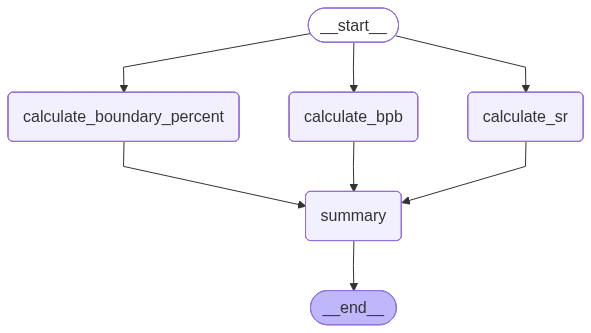

In [30]:
workflow

In [31]:
initial_state = {
    'runs': 100,
    'balls': 50,
    'fours': 6,
    'sixes': 4
}

workflow.invoke(initial_state)

{'runs': 100,
 'balls': 50,
 'sixes': 4,
 'fours': 6,
 'sr': 200.0,
 'bpb': 12.333333333333334,
 'boundary_percent': 48.0,
 'summary': '\n    Strike Rate- 200.0 \n\n    Balls per boundary - 48.0\n    '}